In [1]:
%matplotlib inline
from imp import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import os.path
import zipfile
import datetime
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.stats import linregress
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1)
red, blue, green = sns.color_palette("Set1", 3)

plt.warnings.simplefilter("ignore", category=FutureWarning)
plt.warnings.filterwarnings('ignore', message='axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.')

In [2]:
import lmfit
import curveball
from curveball import baranyi_roberts_model 

In [3]:
import os
os.getcwd

<function nt.getcwd>

In [11]:
plate = pd.read_csv(r"W-WB-B.csv")
df = curveball.ioutils.read_tecan_xlsx('C:/Users/Dana/Dropbox/notebooks/experiments/Dana_WB_310716.xlsx', plate=plate, max_time=14)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


In [12]:
# in order to get an intiaial parameters guess
m1 = curveball.models.fit_model(df[df.Strain=='W'],models=curveball.baranyi_roberts_model.BaranyiRoberts, PLOT=False, PRINT=False)[0]

In [6]:
params = m1.best_values
params

{'K': 0.6132222668975702,
 'nu': 0.10000001877720655,
 'q0': 0.067341891397567633,
 'r': 6.1554280613341987,
 'v': 2.8024024262832823,
 'y0': 0.14863577064467148}

In [7]:
t = np.linspace(0,17)

In [14]:
K, nu, q0, r, v, y0 = params['K'], params['nu'], params ['q0'], params['r'], params['v'], params['y0']
lambda_0 = 1/v * np.log(1 + 1/q0)
pgds = np.linspace(0, lambda_0, 50)
#lags = np.empty_like(pgds)

lags = 1/v * np.log(1 + 1/(q0* np.exp(v*pgds)))

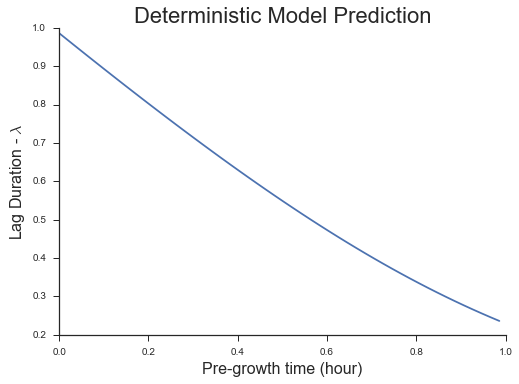

In [19]:
plt.plot(pgds, lags)

plt.title('Deterministic Model Prediction', size=22)
plt.xlabel('Pre-growth time (hour)', size=16)
plt.ylabel(r'Lag Duration - $\lambda$', size=16)
sns.despine()

plt.savefig('Deterministic Model Prediction.png')